<a href="https://colab.research.google.com/github/benson40/Mini-Project---College/blob/main/Parkinson's_disease_prediction_using_ML_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing the neccesary libraries

In [ ]:
#importing all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
#importing the dataset(17th no. column is the dependent class variable )
dataset = pd.read_csv('parkinsons.csv')
X=dataset.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18,19,20,21,22,23]].values
Y=dataset.iloc[:,17].values 

In [ ]:
dataset

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,0.02336,0.02498,0.02745,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,0.01604,0.01657,0.01879,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,0.01265,0.01321,0.01588,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


# Analysing the data

In [ ]:
dataset.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
#Correlation
dataset.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,-0.094717,-0.070682,-0.077774,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,-0.003743,-0.009997,0.004937,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,-0.150747,-0.101095,-0.107293,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,0.746625,0.725561,0.758255,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,0.697153,0.648961,0.648793,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,0.744912,0.709927,0.737455,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,0.763580,0.786780,0.804139,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,0.744894,0.709907,0.737439,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,0.987625,0.982835,0.950083,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,0.963198,0.973751,0.960977,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


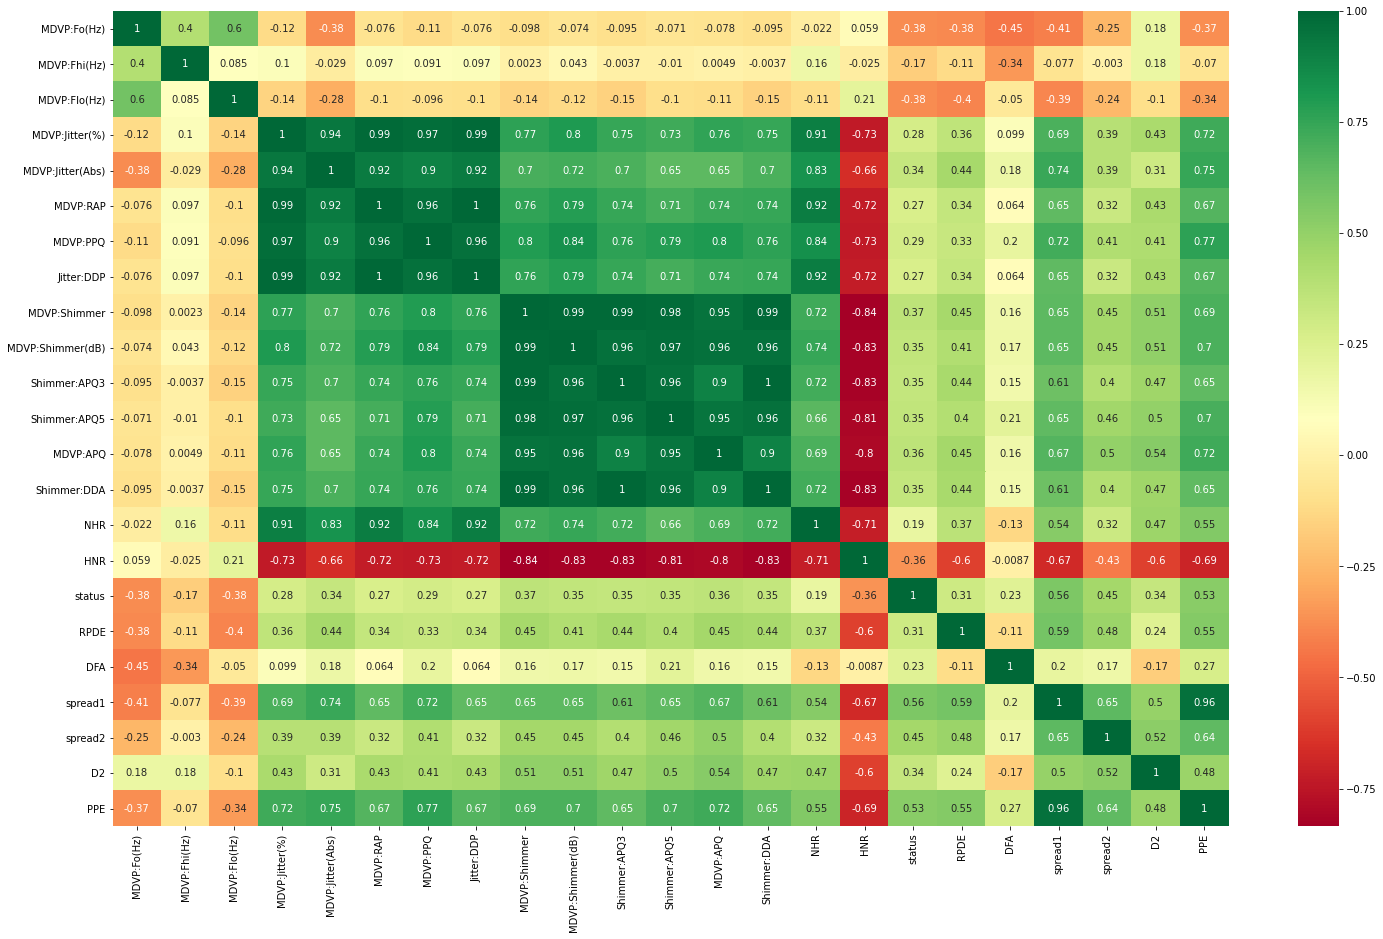

In [ ]:
import seaborn as sns
corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(25,15))
#plot heat map
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
#Checking how many people are suffering from Parkinson's Disease and how may are healthy
#1-Means the person is suffering from Parkinson's Disease
#0-Means the person is healthy
dataset['status'].value_counts()  

1    147
0     48
Name: status, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


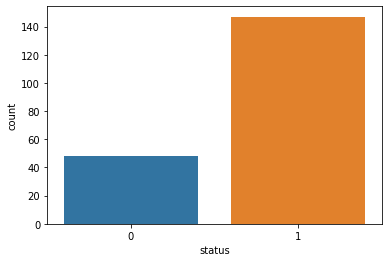

In [ ]:
import seaborn as sns
sns.countplot(dataset['status'],label="count")

# Splitting the data into training and testing data

In [ ]:
#Splitting the data into training and testing data using scikit library 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,Y,test_size=0.2,random_state=0)

# Data Preprocessing

In [ ]:
#Feature Scaling(Normalization)
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
X_test

array([[-1.39240702e+00, -1.03177646e+00, -6.39882078e-01,
        -4.06992866e-01, -1.42903286e-01, -2.98448321e-01,
        -3.22593528e-01, -2.97492537e-01, -4.07764083e-01,
        -4.23973499e-01, -2.99011770e-01, -3.73880760e-01,
        -5.11323405e-01, -2.98999852e-01, -4.23039828e-01,
         1.08991102e-01,  7.63394256e-01,  1.02739841e+00,
        -3.01882476e-01, -1.83882781e+00, -9.24841548e-01,
        -3.14383159e-01],
       [-4.35375863e-01, -4.44074995e-01,  4.09642413e-01,
        -6.72245888e-01, -6.83337529e-01, -6.97675522e-01,
        -6.78064904e-01, -6.96714983e-01, -8.99920345e-01,
        -8.62663742e-01, -8.87426410e-01, -8.78534519e-01,
        -7.43171542e-01, -8.87418927e-01, -4.91188069e-01,
         8.75411485e-01, -3.75951298e-01, -1.26408900e+00,
        -7.80065850e-01, -9.50000564e-01, -9.57477306e-01,
        -7.42629833e-01],
       [ 1.20494772e+00,  8.41732685e-02,  1.99829396e+00,
        -8.87883237e-01, -9.80576363e-01, -7.75045135e-01,
    

In [ ]:
#Dimensionality Reduction by applying PCA(Pricipal Component Analysis) 
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)
variance=pca.explained_variance_ratio_
X_test

array([[-1.42986397, -1.6107436 ],
       [-3.2462128 ,  0.0826058 ],
       [-4.91695568,  1.78511419],
       [-1.76439971,  1.4179429 ],
       [-2.71477607, -1.18226218],
       [ 2.21510585, -1.75886912],
       [-1.33246598, -1.37476944],
       [-0.54019771, -0.56318983],
       [-0.99588409, -1.59465053],
       [ 3.93442561, -1.461674  ],
       [-2.40348433, -1.96552376],
       [ 2.77831826, -1.45390764],
       [-0.2487572 , -0.96634713],
       [ 0.60052   , -1.00713688],
       [-2.44043377,  3.38581592],
       [-1.67423976, -0.20905909],
       [ 0.17448754, -0.17044418],
       [-3.15519386,  2.09141436],
       [-3.70016952,  3.51215799],
       [ 3.79687425,  1.3684829 ],
       [ 1.37265488, -2.18587745],
       [-2.71676771, -1.35731833],
       [ 1.83747567, -1.59422552],
       [ 3.41361069,  0.15760247],
       [-3.70518583,  3.89657413],
       [ 1.36651245, -2.24978997],
       [-0.67095607,  0.20201721],
       [-3.73627139,  3.19830542],
       [-2.58831584,

# Building ML Model 

In [ ]:
 #Fitting into the KNN model
##from sklearn.neighbors import KNeighborsClassifier
#Classify= KNeighborsClassifier(p=2,metric='minkowski')  #p=2 means we are using euclidean distance
#Classify.fit(X_train,y_train)

#Fitting into the SVM model
#from sklearn.svm import SVC
#classifier=SVC(kernel='linear',random_state=0)
#classifier.fit(X_train,y_train)

#Fitting into the Naive Bayes(NB) classifier
#from sklearn.naive_bayes import GaussianNB
#classifier=GaussianNB()
#classifier.fit(X_train,y_train)

#Fitting into the Random forest classifier
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
classifier.fit(X_train,y_train)
X_test[0]

array([-1.42986397, -1.6107436 ])

#Predicting the result

In [ ]:
#Predicting the results
y_pred=classifier.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
y_test

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Evaluation using confusion matrix and accuracy

In [ ]:
#Seeing the confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
accuracy_score(y_test,y_pred)*100

97.43589743589743

In [ ]:
cm

array([[10,  0],
       [ 1, 28]])

In [ ]:
#Testing on a new data
test=np.array([1.83747567, -1.59422552 ])
test=test.reshape(1,-1)
pred=classifier.predict(test)
Category=['No you dont have Parkinsons Disease','Yes,you have Parkinsons Disease']
x=int(pred)
print(Category[x])

Yes,you have Parkinsons Disease
